# FIAP - 7IADT/2025 - Tech Challenge – Fase 1

Link do relatório técnico: [clique aqui](https://lookerstudio.google.com/u/0/reporting/719eab0c-9b0a-4ca4-b355-4870f939c407/page/p_koruyzpjxd)

**Objetivo**
* O objetivo deste estudo é desenvolver um modelo estatístico de classificação capaz de **identificar a presença de doenças cardíacas a partir de variáveis clínicas e demográficas disponíveis na base de dados**.
* O modelo busca reconhecer padrões associados ao risco cardiovascular, contribuindo para a compreensão dos fatores mais relevantes na predição da condição e para a aplicação prática de técnicas de aprendizado supervisionado no contexto da saúde.

**Dataset**
* Dataset: Maternal Health Risk Data (Kaggle)
* Fonte: Kaggle
* Base de dados: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data?suggestionBundleId=1159
* Tamanho: 2.94 mb

**Grupo**
* RM 367988 - Allan Ribeiro
* RM 369026 - Diego Cordeiro
* RM 369057 - Gustavo Neto


# 1 - Carregamento dos dados

In [106]:
#Imports Pandas e Numpy
import pandas as pd
import numpy as np

# Carregar o dataset
url = "https://raw.githubusercontent.com/allanribeiro91/fiap-datasets/refs/heads/main/cardio_train.csv"
df_raw = pd.read_csv(url, sep=";")
df_raw = df_raw.drop('id', axis='columns')
df_raw.shape

(70000, 12)

# 2 - Tratamento dos dados

## 2.1 - Criando cópia dos dados brutos

In [107]:
df = df_raw.copy()
df.shape

(70000, 12)

## 2.2 - Remoção de outliers

### Variável: AGE

Limite inferior: 33.0
Limite superior: 73.0
Total de outliers em 'age': 4


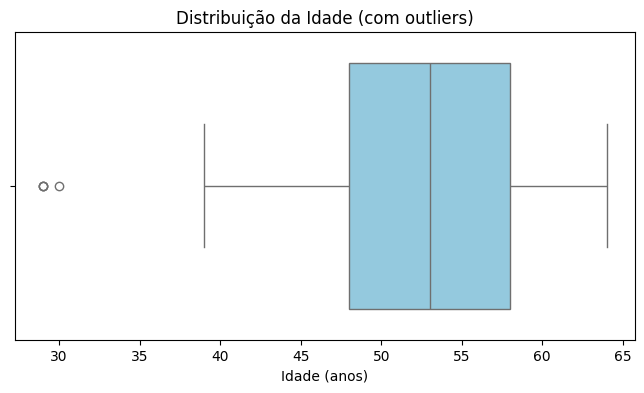

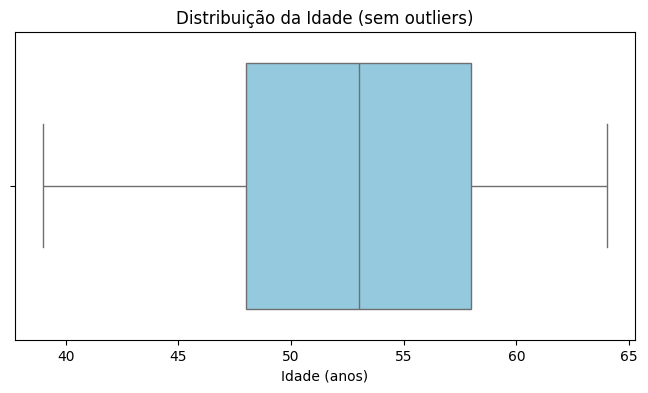

Tamanho original: 70000
Tamanho após remoção: 69996


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter idade de dias para anos
df['age'] = df['age'] / 365
df['age'] = df['age'].astype(int)

# Calcular Q1, Q3 e IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_age = df[(df['age'] < limite_inferior) | (df['age'] > limite_superior)]

print(f"Limite inferior: {limite_inferior:.1f}")
print(f"Limite superior: {limite_superior:.1f}")
print(f"Total de outliers em 'age': {len(outliers_age)}")

# Visualização com Seaborn
plt.figure(figsize=(8,4))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Distribuição da Idade (com outliers)')
plt.xlabel('Idade (anos)')
plt.show()

# Exemplo de remoção dos outliers, se desejar
df_sem_outliers_age = df[(df['age'] >= limite_inferior) & (df['age'] <= limite_superior)]

# Visualização com Seaborn
plt.figure(figsize=(8,4))
sns.boxplot(x=df_sem_outliers_age['age'], color='skyblue')
plt.title('Distribuição da Idade (sem outliers)')
plt.xlabel('Idade (anos)')
plt.show()

print(f"Tamanho original: {len(df)}")
print(f"Tamanho após remoção: {len(df_sem_outliers_age)}")

### Variável: HEIGHT

Limite inferior: 142.5 cm
Limite superior: 186.5 cm
Total de outliers identificados: 519
Faixa normal: 55 a 250 cm


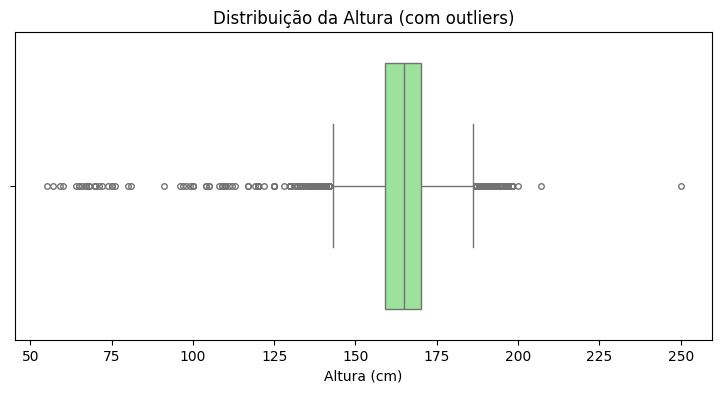

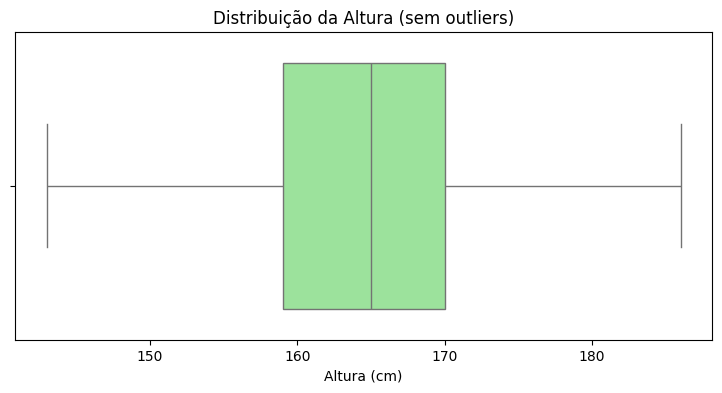

Registros válidos após remoção: (69477, 12)


In [109]:
# Calcular Q1, Q3 e IQR
Q1 = df_sem_outliers_age['height'].quantile(0.25)
Q3 = df_sem_outliers_age['height'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_height = df_sem_outliers_age[(df_sem_outliers_age['height'] < limite_inferior) | (df_sem_outliers_age['height'] > limite_superior)]

print(f"Limite inferior: {limite_inferior:.1f} cm")
print(f"Limite superior: {limite_superior:.1f} cm")
print(f"Total de outliers identificados: {len(outliers_height)}")
print(f"Faixa normal: {df_sem_outliers_age['height'].min():.0f} a {df_sem_outliers_age['height'].max():.0f} cm")

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_age['height'], color='lightgreen', fliersize=4)
plt.title("Distribuição da Altura (com outliers)")
plt.xlabel("Altura (cm)")
plt.show()

# Base sem outliers de altura
df_sem_outliers_height = df_sem_outliers_age[(df_sem_outliers_age['height'] >= limite_inferior) & (df_sem_outliers_age['height'] <= limite_superior)]

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_height['height'], color='lightgreen', fliersize=4)
plt.title("Distribuição da Altura (sem outliers)")
plt.xlabel("Altura (cm)")
plt.show()

print("Registros válidos após remoção:", df_sem_outliers_height.shape)

### Variável: WEIGHT

Limite inferior: 39.5 kg
Limite superior: 107.5 kg
Total de outliers identificados: 1758
Faixa normal: 10.0 a 200.0 kg


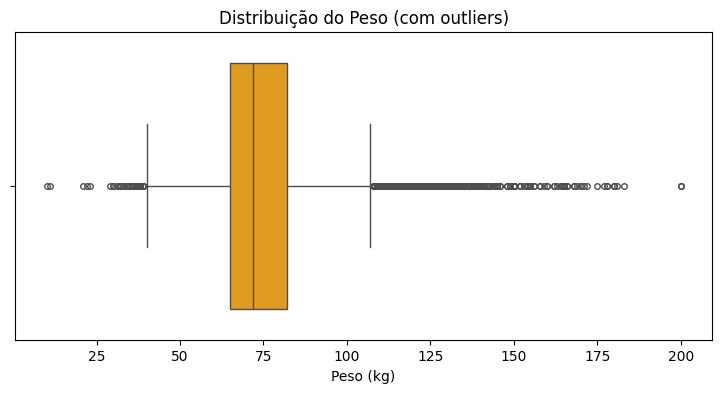

40.0
107.0
Limites calculados:
39.5 107.5


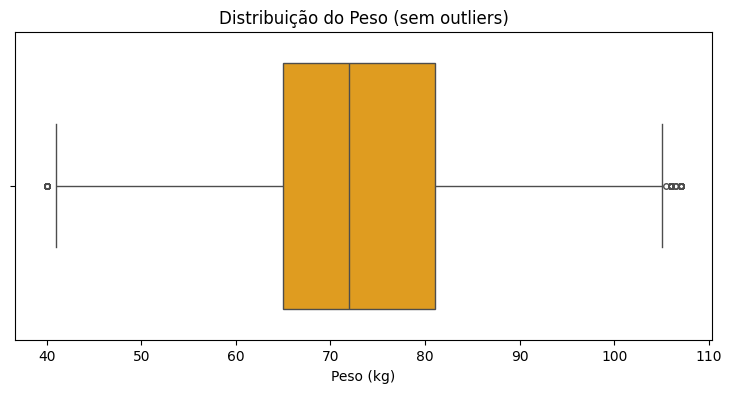

Registros válidos após remoção: (67719, 12)


In [147]:
# Converter peso para float
# Explicitly create a copy to avoid SettingWithCopyWarning
df_sem_outliers_height = df_sem_outliers_height.copy()
df_sem_outliers_height['weight'] = df_sem_outliers_height['weight'].astype(float)

# Calcular Q1, Q3 e IQR
Q1 = df_sem_outliers_height['weight'].quantile(0.25)
Q3 = df_sem_outliers_height['weight'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_weight = df_sem_outliers_height[
    (df_sem_outliers_height['weight'] < limite_inferior) |
    (df_sem_outliers_height['weight'] > limite_superior)
]

print(f"Limite inferior: {limite_inferior:.1f} kg")
print(f"Limite superior: {limite_superior:.1f} kg")
print(f"Total de outliers identificados: {len(outliers_weight)}")


print(f"Faixa normal: {df_sem_outliers_height['weight'].min():.1f} a {df_sem_outliers_height['weight'].max():.1f} kg")

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_height['weight'], color='orange', fliersize=4)
plt.title("Distribuição do Peso (com outliers)")
plt.xlabel("Peso (kg)")
plt.show()

# Base sem outliers de peso
df_sem_outliers_weight = df_sem_outliers_height[
    (df_sem_outliers_height['weight'] >= limite_inferior) &
    (df_sem_outliers_height['weight'] <= limite_superior)
]

print(df_sem_outliers_weight['weight'].min())
print(df_sem_outliers_weight['weight'].max())

print("Limites calculados:")
print(limite_inferior, limite_superior)

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_weight['weight'], color='orange', fliersize=4)
plt.title("Distribuição do Peso (sem outliers)")
plt.xlabel("Peso (kg)")
plt.show()

print("Registros válidos após remoção:", df_sem_outliers_weight.shape)

### Variável: AP_HI (Pressão Sistólica)

Limite inferior: 90 mmHg
Limite superior: 170 mmHg
Total de outliers identificados: 1309
Faixa normal: -150 a 16020 mmHg


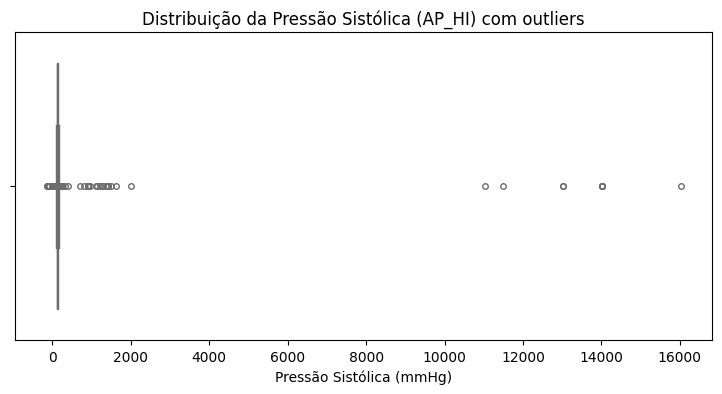

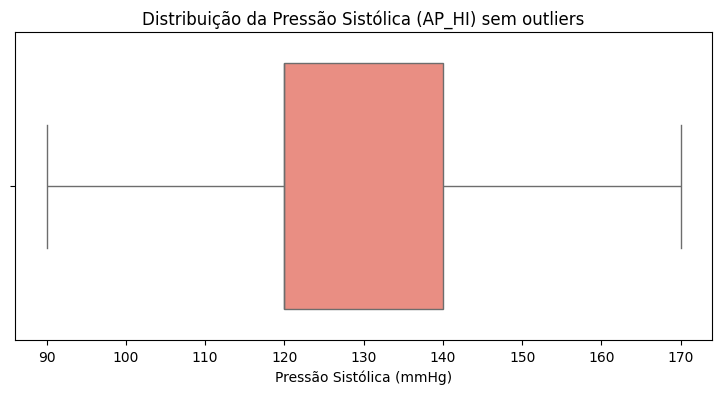

Registros válidos após remoção: (66410, 12)


In [111]:
# Calcular Q1, Q3 e IQR
Q1 = df_sem_outliers_weight['ap_hi'].quantile(0.25)
Q3 = df_sem_outliers_weight['ap_hi'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_ap_hi = df_sem_outliers_weight[
    (df_sem_outliers_weight['ap_hi'] < limite_inferior) |
    (df_sem_outliers_weight['ap_hi'] > limite_superior)
]

print(f"Limite inferior: {limite_inferior:.0f} mmHg")
print(f"Limite superior: {limite_superior:.0f} mmHg")
print(f"Total de outliers identificados: {len(outliers_ap_hi)}")
print(f"Faixa normal: {df_sem_outliers_weight['ap_hi'].min():.0f} a {df_sem_outliers_weight['ap_hi'].max():.0f} mmHg")

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_weight['ap_hi'], color='salmon', fliersize=4)
plt.title("Distribuição da Pressão Sistólica (AP_HI) com outliers")
plt.xlabel("Pressão Sistólica (mmHg)")
plt.show()

# Base sem outliers de pressão sistólica
df_sem_outliers_ap_hi = df_sem_outliers_weight[
    (df_sem_outliers_weight['ap_hi'] >= limite_inferior) &
    (df_sem_outliers_weight['ap_hi'] <= limite_superior)
]

plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_ap_hi['ap_hi'], color='salmon', fliersize=4)
plt.title("Distribuição da Pressão Sistólica (AP_HI) sem outliers")
plt.xlabel("Pressão Sistólica (mmHg)")
plt.show()

print("Registros válidos após remoção:", df_sem_outliers_ap_hi.shape)

### Variável: AP_LO (Pressão Diastólica)

Limite inferior: 65 mmHg
Limite superior: 105 mmHg
Total de outliers identificados: 3908
Faixa normal: 0 a 10000 mmHg


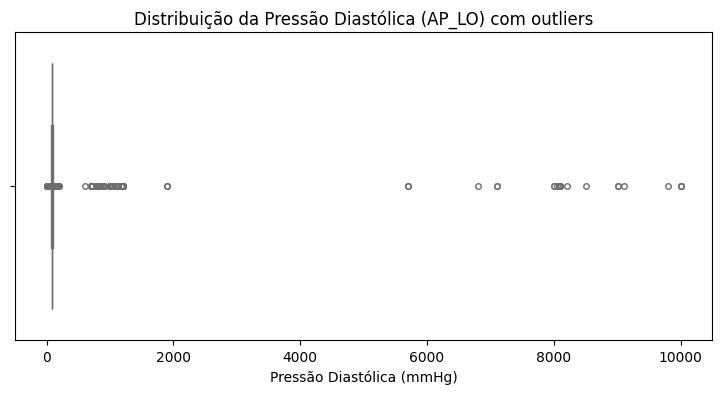

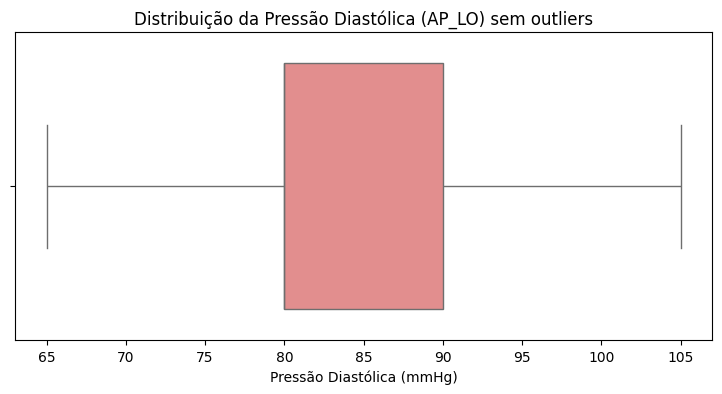

Registros válidos após remoção: (62502, 12)


In [112]:
# Calcular Q1, Q3 e IQR
Q1 = df_sem_outliers_ap_hi['ap_lo'].quantile(0.25)
Q3 = df_sem_outliers_ap_hi['ap_lo'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_ap_lo = df_sem_outliers_ap_hi[
    (df_sem_outliers_ap_hi['ap_lo'] < limite_inferior) |
    (df_sem_outliers_ap_hi['ap_lo'] > limite_superior)
]

print(f"Limite inferior: {limite_inferior:.0f} mmHg")
print(f"Limite superior: {limite_superior:.0f} mmHg")
print(f"Total de outliers identificados: {len(outliers_ap_lo)}")
print(f"Faixa normal: {df_sem_outliers_ap_hi['ap_lo'].min():.0f} a {df_sem_outliers_ap_hi['ap_lo'].max():.0f} mmHg")

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_ap_hi['ap_lo'], color='lightcoral', fliersize=4)
plt.title("Distribuição da Pressão Diastólica (AP_LO) com outliers")
plt.xlabel("Pressão Diastólica (mmHg)")
plt.show()

# Base sem outliers de pressão diastólica
df_sem_outliers_ap_lo = df_sem_outliers_ap_hi[
    (df_sem_outliers_ap_hi['ap_lo'] >= limite_inferior) &
    (df_sem_outliers_ap_hi['ap_lo'] <= limite_superior)
]

# Visualização
plt.figure(figsize=(9,4))
sns.boxplot(x=df_sem_outliers_ap_lo['ap_lo'], color='lightcoral', fliersize=4)
plt.title("Distribuição da Pressão Diastólica (AP_LO) sem outliers")
plt.xlabel("Pressão Diastólica (mmHg)")
plt.show()

print("Registros válidos após remoção:", df_sem_outliers_ap_lo.shape)

### Resumo dos outliers

In [113]:
import pandas as pd

# Criar uma lista com as informações resumidas
tabela_outliers = [
    {
        "Variável": "AGE (anos)",
        "Limite Inferior": round(df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 1),
        "Limite Superior": round(df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 1),
        "Mínimo (real)": int(df['age'].min()),
        "Máximo (real)": int(df['age'].max()),
        "Outliers": len(outliers_age),
        "Registros antes": len(df),
        "Registros após": len(df_sem_outliers_age),
    },
    {
        "Variável": "HEIGHT (cm)",
        "Limite Inferior": round(df_sem_outliers_age['height'].quantile(0.25) - 1.5 * (df_sem_outliers_age['height'].quantile(0.75) - df_sem_outliers_age['height'].quantile(0.25)), 1),
        "Limite Superior": round(df_sem_outliers_age['height'].quantile(0.75) + 1.5 * (df_sem_outliers_age['height'].quantile(0.75) - df_sem_outliers_age['height'].quantile(0.25)), 1),
        "Mínimo (real)": int(df_sem_outliers_age['height'].min()),
        "Máximo (real)": int(df_sem_outliers_age['height'].max()),
        "Outliers": len(outliers_height),
        "Registros antes": len(df_sem_outliers_age),
        "Registros após": len(df_sem_outliers_height),
    },
    {
        "Variável": "WEIGHT (kg)",
        "Limite Inferior": round(df_sem_outliers_height['weight'].quantile(0.25) - 1.5 * (df_sem_outliers_height['weight'].quantile(0.75) - df_sem_outliers_height['weight'].quantile(0.25)), 1),
        "Limite Superior": round(df_sem_outliers_height['weight'].quantile(0.75) + 1.5 * (df_sem_outliers_height['weight'].quantile(0.75) - df_sem_outliers_height['weight'].quantile(0.25)), 1),
        "Mínimo (real)": round(df_sem_outliers_height['weight'].min(), 1),
        "Máximo (real)": round(df_sem_outliers_height['weight'].max(), 1),
        "Outliers": len(outliers_weight),
        "Registros antes": len(df_sem_outliers_height),
        "Registros após": len(df_sem_outliers_weight),
    },
    {
        "Variável": "AP_HI (mmHg)",
        "Limite Inferior": int(df_sem_outliers_weight['ap_hi'].quantile(0.25) - 1.5 * (df_sem_outliers_weight['ap_hi'].quantile(0.75) - df_sem_outliers_weight['ap_hi'].quantile(0.25))),
        "Limite Superior": int(df_sem_outliers_weight['ap_hi'].quantile(0.75) + 1.5 * (df_sem_outliers_weight['ap_hi'].quantile(0.75) - df_sem_outliers_weight['ap_hi'].quantile(0.25))),
        "Mínimo (real)": int(df_sem_outliers_weight['ap_hi'].min()),
        "Máximo (real)": int(df_sem_outliers_weight['ap_hi'].max()),
        "Outliers": len(outliers_ap_hi),
        "Registros antes": len(df_sem_outliers_weight),
        "Registros após": len(df_sem_outliers_ap_hi),
    },
    {
        "Variável": "AP_LO (mmHg)",
        "Limite Inferior": int(df_sem_outliers_ap_hi['ap_lo'].quantile(0.25) - 1.5 * (df_sem_outliers_ap_hi['ap_lo'].quantile(0.75) - df_sem_outliers_ap_hi['ap_lo'].quantile(0.25))),
        "Limite Superior": int(df_sem_outliers_ap_hi['ap_lo'].quantile(0.75) + 1.5 * (df_sem_outliers_ap_hi['ap_lo'].quantile(0.75) - df_sem_outliers_ap_hi['ap_lo'].quantile(0.25))),
        "Mínimo (real)": int(df_sem_outliers_ap_hi['ap_lo'].min()),
        "Máximo (real)": int(df_sem_outliers_ap_hi['ap_lo'].max()),
        "Outliers": len(outliers_ap_lo),
        "Registros antes": len(df_sem_outliers_ap_hi),
        "Registros após": len(df_sem_outliers_ap_lo),
    }
]

# Converter para DataFrame
df_outliers_resumo = pd.DataFrame(tabela_outliers)

# Calcular redução percentual
df_outliers_resumo["Redução (%)"] = (
    100 * (df_outliers_resumo["Registros antes"] - df_outliers_resumo["Registros após"]) / df_outliers_resumo["Registros antes"]
).round(2)

# Exibir tabela formatada
display(df_outliers_resumo.style.background_gradient(subset=["Redução (%)"], cmap="Reds"))


,Variável,Limite Inferior,Limite Superior,Mínimo (real),Máximo (real),Outliers,Registros antes,Registros após,Redução (%)
0,AGE (anos),33.000000,73.000000,29.000000,64.000000,4,70000,69996,0.010000
1,HEIGHT (cm),142.500000,186.500000,55.000000,250.000000,519,69996,69477,0.740000
2,WEIGHT (kg),39.500000,107.500000,10.000000,200.000000,1758,69477,67719,2.530000
3,AP_HI (mmHg),90.000000,170.000000,-150.000000,16020.000000,1309,67719,66410,1.930000
4,AP_LO (mmHg),65.000000,105.000000,0.000000,10000.000000,3908,66410,62502,5.880000


## 2.3 - Remoção de Valores Atípicos

In [114]:
# Copia a base
df_sem_outliers = df_sem_outliers_ap_lo.copy()

# Limites fisiológicos
lim = {
    "age":    {"inferior": 39,  "superior": None},  # ver nota sobre unidade!
    "height": {"inferior": 130, "superior": 250},
    "weight": {"inferior": 40,  "superior": None},
    "ap_hi":  {"inferior": 60,  "superior": 240},
    "ap_lo":  {"inferior": 40,  "superior": 130},
}

# Condições de validade
cond_validos = (
    (df_sem_outliers["age"]    >= lim["age"]["inferior"]) &
    (df_sem_outliers["height"].between(lim["height"]["inferior"], lim["height"]["superior"])) &
    (df_sem_outliers["weight"] >= lim["weight"]["inferior"]) &
    (df_sem_outliers["ap_lo"] > df_sem_outliers["ap_hi"]) &
    (df_sem_outliers["ap_hi"].between(lim["ap_hi"]["inferior"], lim["ap_hi"]["superior"])) &
    (df_sem_outliers["ap_lo"].between(lim["ap_lo"]["inferior"], lim["ap_lo"]["superior"]))
)

# Separe válidos x atípicos corretamente
df_validos   = df_sem_outliers.loc[~cond_validos].copy()     # dentro dos limites
df_atipicos  = df_sem_outliers.loc[cond_validos].copy()    # fora dos limites

print(f"Registros antes: {len(df_sem_outliers)}")
print(f"Registros válidos: {len(df_validos)}")
print(f"Registros atípicos removidos: {len(df_atipicos)}")


Registros antes: 62502
Registros válidos: 62500
Registros atípicos removidos: 2


## 2.4 - Impacto da limpeza

=== Impacto da Limpeza dos Dados ===
Registros originais: 70,000
Registros após limpeza: 62,500
Total removido: 7,500 (10.7%)


Etapa,Registros,Percentual (%)
Total original,"70,000",100.000000
Após remoção de outliers e atípicos,"62,500",89.300000


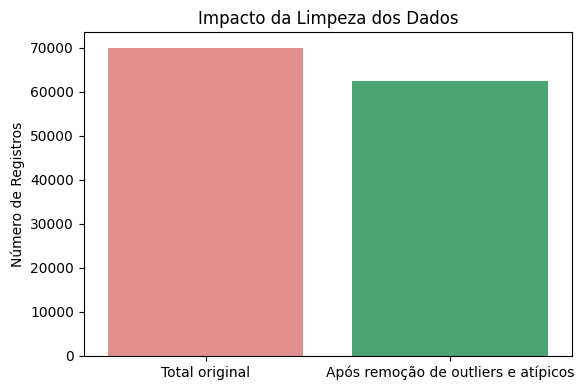

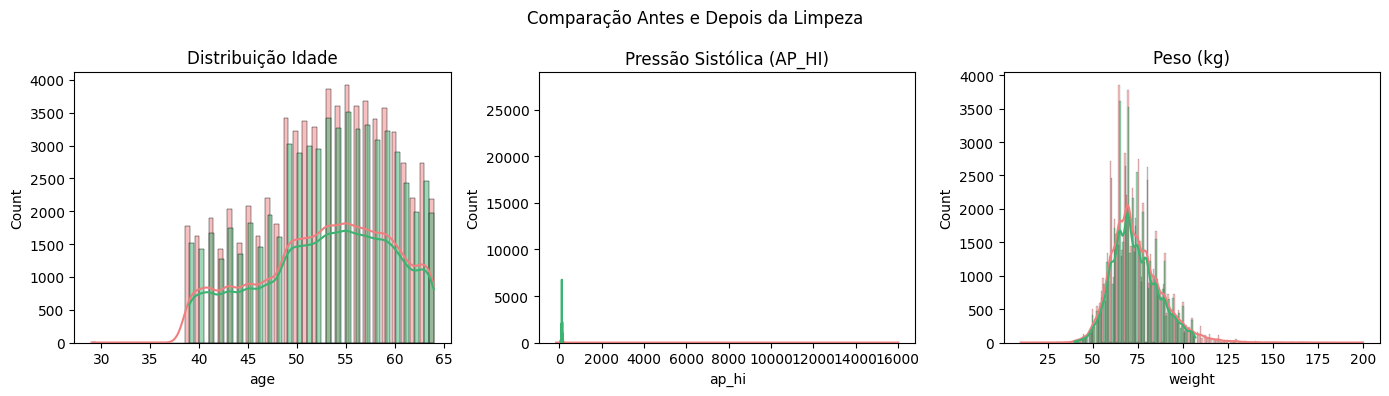

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_limpo = df_validos.copy()

# Bases para comparação
total_inicial = len(df)
total_final = len(df_limpo)
removidos = total_inicial - total_final
percentual_removido = (removidos / total_inicial) * 100

# Exibir resumo geral
print("=== Impacto da Limpeza dos Dados ===")
print(f"Registros originais: {total_inicial:,}")
print(f"Registros após limpeza: {total_final:,}")
print(f"Total removido: {removidos:,} ({percentual_removido:.1f}%)")

# Tabela resumo
tabela_limpeza = pd.DataFrame({
    "Etapa": ["Total original", "Após remoção de outliers e atípicos"],
    "Registros": [total_inicial, total_final],
    "Percentual (%)": [100, round((total_final / total_inicial) * 100, 1)]
})

display(tabela_limpeza.style.hide(axis="index").format({"Registros": "{:,}"}))

# Visualização do impacto geral
plt.figure(figsize=(6,4))
sns.barplot(x="Etapa", y="Registros", data=tabela_limpeza, hue="Etapa", palette=["lightcoral", "mediumseagreen"], legend=False) # Corrigido o FutureWarning
plt.title("Impacto da Limpeza dos Dados")
plt.ylabel("Número de Registros")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Visualização comparativa para múltiplas variáveis (opcional)
fig, axs = plt.subplots(1, 3, figsize=(14,4))
sns.histplot(df["age"], color="lightcoral", kde=True, ax=axs[0])
sns.histplot(df_limpo["age"], color="mediumseagreen", kde=True, ax=axs[0], alpha=0.5)
axs[0].set_title("Distribuição Idade")

sns.histplot(df["ap_hi"], color="lightcoral", kde=True, ax=axs[1])
sns.histplot(df_limpo["ap_hi"], color="mediumseagreen", kde=True, ax=axs[1], alpha=0.5)
axs[1].set_title("Pressão Sistólica (AP_HI)")

sns.histplot(df["weight"], color="lightcoral", kde=True, ax=axs[2])
sns.histplot(df_limpo["weight"], color="mediumseagreen", kde=True, ax=axs[2], alpha=0.5)
axs[2].set_title("Peso (kg)")

plt.suptitle("Comparação Antes e Depois da Limpeza", fontsize=12)
plt.tight_layout()
plt.show()


## 2.5 - Criação de variáveis: IMC, map e pp


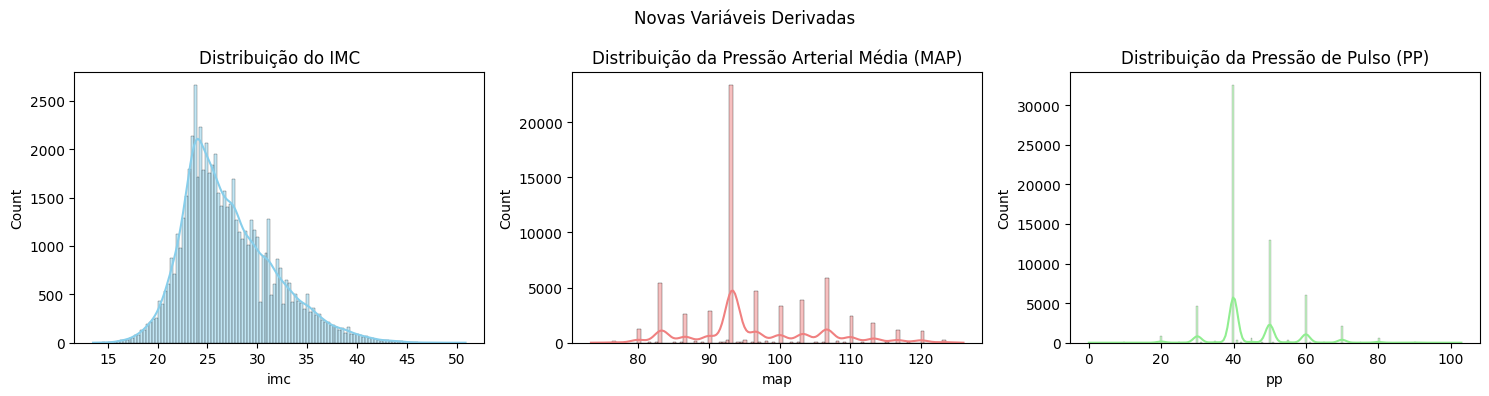

Variáveis após a transformação:

['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'imc', 'map', 'pp']


In [116]:
# Criar cópia da base limpa
df_variaveis_derivadas = df_limpo.copy()

# === Criação das variáveis derivadas ===
df_variaveis_derivadas['imc'] = df_variaveis_derivadas['weight'] / (df_variaveis_derivadas['height'] / 100) ** 2
df_variaveis_derivadas['map'] = (2 * df_variaveis_derivadas['ap_lo'] + df_variaveis_derivadas['ap_hi']) / 3
df_variaveis_derivadas['pp'] = df_variaveis_derivadas['ap_hi'] - df_variaveis_derivadas['ap_lo']

# === Remoção das variáveis originais ===
df_variaveis_derivadas = df_variaveis_derivadas.drop(columns=['height', 'weight', 'ap_hi', 'ap_lo'])

# Visualizar as novas variáveis
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(df_variaveis_derivadas['imc'], kde=True, color='skyblue', ax=axs[0])
axs[0].set_title("Distribuição do IMC")
sns.histplot(df_variaveis_derivadas['map'], kde=True, color='lightcoral', ax=axs[1])
axs[1].set_title("Distribuição da Pressão Arterial Média (MAP)")
sns.histplot(df_variaveis_derivadas['pp'], kde=True, color='lightgreen', ax=axs[2])
axs[2].set_title("Distribuição da Pressão de Pulso (PP)")
plt.suptitle("Novas Variáveis Derivadas", fontsize=12)
plt.tight_layout()
plt.show()

print("Variáveis após a transformação:\n")
print(df_variaveis_derivadas.columns.tolist())


## 2.6 - Correlação

### 1ª Matriz - Exploração

,Variável 1,Variável 2,Correlação
0,age,age,1.000000
1,map,pp,0.575240
2,cholesterol,gluc,0.450070
3,cardio,map,0.414192
4,cardio,pp,0.345622
5,smoke,alco,0.341922
6,gender,smoke,0.337036
7,imc,map,0.246052
8,age,cardio,0.236304
9,cholesterol,cardio,0.218227


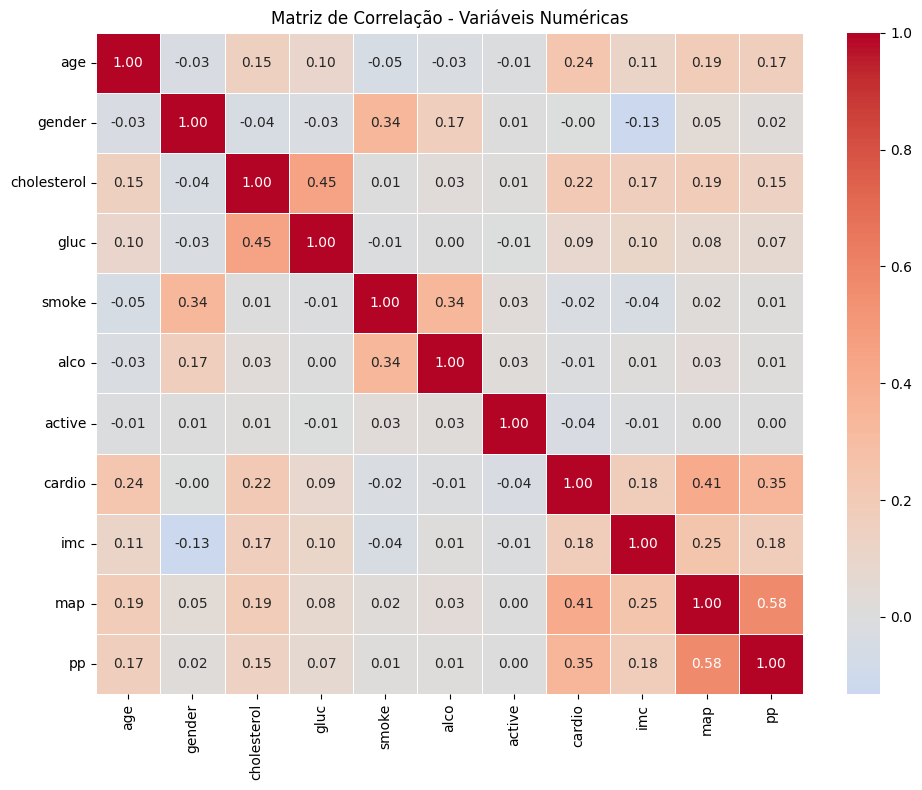

In [117]:
# Selecionar apenas variáveis numéricas
df_correlacao = df_variaveis_derivadas
df_correlacao_numerica = df_correlacao.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlação (Pearson)
matriz_corr = df_correlacao_numerica.corr(method='pearson')

# Exibir as 10 maiores correlações (em valor absoluto, exceto 1.0)
corr_top = (
    matriz_corr.unstack()
    .drop_duplicates()
    .sort_values(ascending=False, key=abs)
    .reset_index()
)
corr_top.columns = ["Variável 1", "Variável 2", "Correlação"]
display(corr_top.head(10))

# Visualização da matriz completa
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.tight_layout()
plt.show()


### 2ª Matriz - Após Remoções

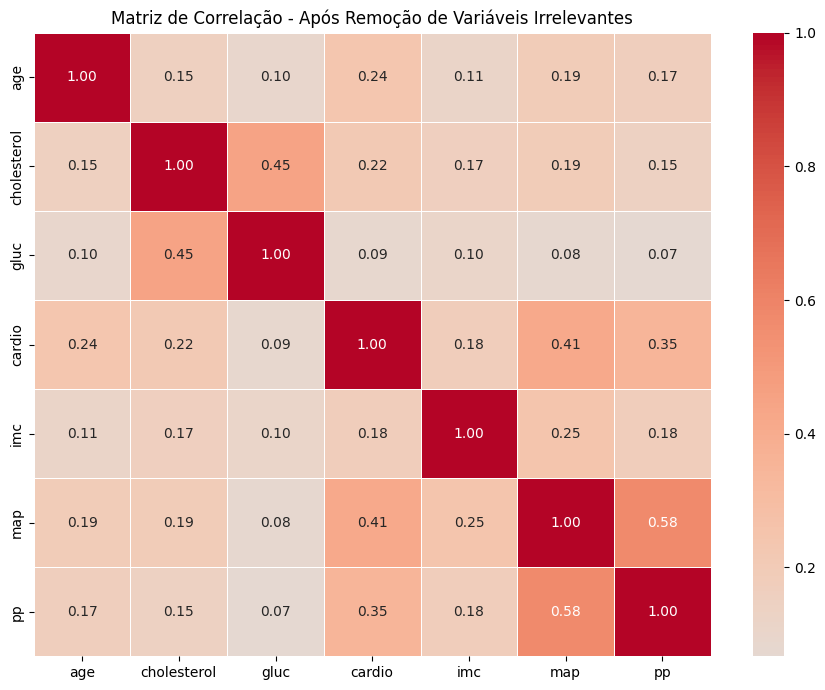

In [118]:
# Criar cópia apenas com as variáveis mantidas
df_correlacao_numerica_apos_remocao = df_correlacao_numerica.drop(columns=['smoke', 'alco', 'active', 'gender'], errors='ignore')

# Calcular nova matriz de correlação
matriz_corr_filtrada = df_correlacao_numerica_apos_remocao.corr(method='pearson')

# Visualização da nova matriz
plt.figure(figsize=(9,7))
sns.heatmap(
    matriz_corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Matriz de Correlação - Após Remoção de Variáveis Irrelevantes")
plt.tight_layout()
plt.show()


## 2.7 - Base para Modelagem

In [119]:
# Criar cópia da base de correlação
df_modelagem = df_correlacao_numerica_apos_remocao.copy()

print("Dimensão final da base:", df_modelagem.shape)

# Exibir as colunas finais
print("\nVariáveis mantidas para modelagem:")
print(df_modelagem.columns.tolist())

Dimensão final da base: (62500, 7)

Variáveis mantidas para modelagem:
['age', 'cholesterol', 'gluc', 'cardio', 'imc', 'map', 'pp']


## 2.8 - Bases de Treino, Validação e Teste

In [120]:
## 2.7 - Bases de Treino, Validação e Teste
from sklearn.model_selection import train_test_split

# Define as variáveis independentes (X) e a variável alvo (y)
X = df_modelagem.drop(columns=['cardio'])
y = df_modelagem['cardio']

# 1ª divisão: separa o conjunto de teste (15%) e o restante (85%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,         # 15% para teste
    random_state=42,
    stratify=y
)

# 2ª divisão: divide o restante em treino (70%) e validação (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1765,       # 0.1765 * 85% ≈ 15% total
    random_state=42,
    stratify=y_temp
)

# Verifica o tamanho das bases
print(f"Treinamento: {X_train.shape}")
print(f"Validação:   {X_val.shape}")
print(f"Teste:       {X_test.shape}")


Treinamento: (43748, 6)
Validação:   (9377, 6)
Teste:       (9375, 6)


# 3 - Treinamento de Modelos


## 3.1 - Tabela de Comparação de Modelos

In [121]:
import pandas as pd

# Cria tabela vazia para armazenar resultados comparativos
tabela_comparacao_modelos = pd.DataFrame(
    columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1', 'AUC']
)

# Função auxiliar para registrar os resultados de cada modelo
def registrar_resultado(modelo, y_true, y_pred, y_prob=None):
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score,
        f1_score, roc_auc_score
    )

    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None

    resultado = pd.DataFrame([{
        'Modelo': modelo,
        'Acurácia': round(acuracia, 3),
        'Precisão': round(precisao, 3),
        'Recall': round(recall, 3),
        'F1': round(f1, 3),
        'AUC': round(auc, 3) if auc else None
    }])

    global tabela_comparacao_modelos
    # Concatenar explicitamente, tratando o caso inicial de tabela vazia
    if tabela_comparacao_modelos.empty:
        tabela_comparacao_modelos = resultado
    else:
        tabela_comparacao_modelos = pd.concat([tabela_comparacao_modelos, resultado], ignore_index=True)


    return resultado

### Sobre os modelos selecionados:
* Foram selecionados quatro modelos que representam diferentes abordagens de aprendizado de máquina, garantindo diversidade metodológica e comparabilidade de desempenho.
* O KNN foi incluído como modelo baseado em vizinhança, simples e intuitivo, útil como linha de base não paramétrica.
* A Regressão Logística representa o modelo linear clássico, interpretável e eficiente em conjuntos de dados estruturados.
* O XGBoost foi escolhido por seu alto desempenho em problemas tabulares e por combinar múltiplas árvores de decisão com regularização para evitar overfitting.
* Por fim, a Rede Neural (MLP) oferece uma abordagem mais flexível e moderna, capaz de capturar relações não lineares complexas entre as variáveis.

## 3.1.1 - Definição de Funções comuns
* Curva ROC
* Matriz de Confusão

In [122]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_prob, model_name="Modelo"):
    """
    Gera e exibe a Curva ROC.

    Args:
        y_true (array): Rótulos verdadeiros.
        y_prob (array): Probabilidades previstas para a classe positiva.
        model_name (str): Nome do modelo para o título do gráfico.
    """
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (área = {roc_auc:.3f})')
    plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name="Modelo"):
    """
    Gera e exibe a Matriz de Confusão.

    Args:
        y_true (array): Rótulos verdadeiros.
        y_pred (array): Rótulos previstos.
        model_name (str): Nome do modelo para o título do gráfico.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem Doença', 'Com Doença'])

    plt.figure(figsize=(5,4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

## 3.2 - KNN

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Pipeline: padronização + modelo
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Grade de hiperparâmetros
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 15],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["minkowski", "manhattan"]
}

# GridSearch com validação cruzada (interna)
grid_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Treina o modelo (com base de treino)
grid_knn.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", grid_knn.best_params_)

# ==================================================
# Etapa 1: Validação externa (avaliação do modelo)
# ==================================================
best_knn = grid_knn.best_estimator_
y_pred_val = best_knn.predict(X_val)
y_prob_val = best_knn.predict_proba(X_val)[:, 1]

print("\n📊 Relatório de Classificação - KNN (Validação)")
print(classification_report(y_val, y_pred_val))



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros encontrados: {'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__weights': 'uniform'}

📊 Relatório de Classificação - KNN (Validação)
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      4746
           1       0.72      0.69      0.70      4631

    accuracy                           0.72      9377
   macro avg       0.72      0.71      0.71      9377
weighted avg       0.72      0.72      0.71      9377



In [124]:
# ==================================================
# Etapa 2: Avaliação final no conjunto de teste
# ==================================================
best_knn.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))  # reentreina com tudo exceto o teste

y_pred_test = best_knn.predict(X_test)
y_prob_test = best_knn.predict_proba(X_test)[:, 1]

print("\n📊 Relatório Final - KNN (Teste)")
print(classification_report(y_test, y_pred_test))

registrar_resultado("KNN (Final - Teste)", y_test, y_pred_test, y_prob_test)



📊 Relatório Final - KNN (Teste)
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      4745
           1       0.71      0.67      0.69      4630

    accuracy                           0.70      9375
   macro avg       0.70      0.70      0.70      9375
weighted avg       0.70      0.70      0.70      9375



,Modelo,Acurácia,Precisão,Recall,F1,AUC
0,KNN (Final - Teste),0.705,0.712,0.675,0.693,0.766


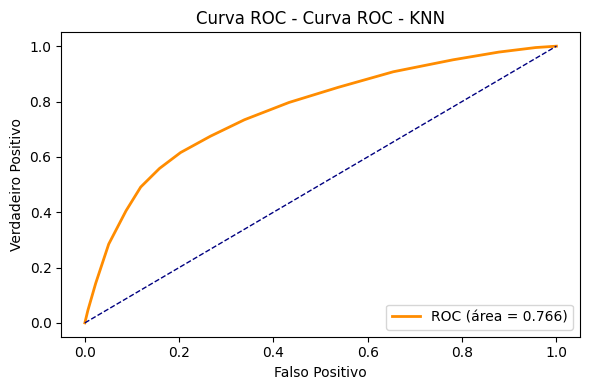

In [125]:
## Plotar Curva ROC
plot_roc_curve(y_test, y_prob_test, model_name="Curva ROC - KNN")

<Figure size 500x400 with 0 Axes>

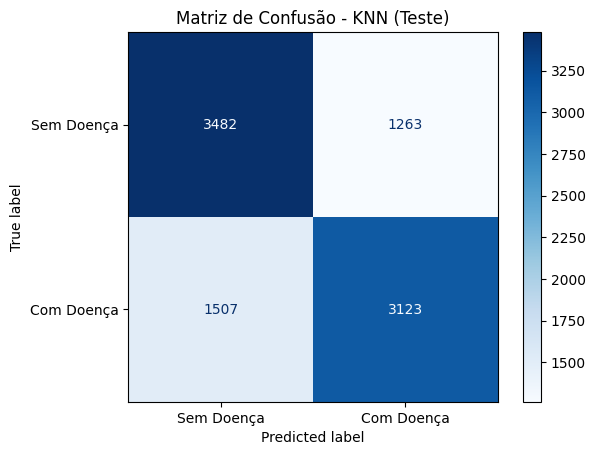

In [126]:
# Garante que as previsões existam
y_pred_knn = best_knn.predict(X_test)

# Plotar Matriz de Confusão
plot_confusion_matrix(y_test, y_pred_knn, model_name="KNN (Teste)")

## 3.3 - Regressão Logística

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Pipeline: padronização + modelo
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42))
])

# Grade de hiperparâmetros
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 5, 10],        # força da regularização
    'logreg__penalty': ['l2'],                 # regularização ridge
    'logreg__class_weight': [None, 'balanced'] # pesos automáticos
}

# GridSearchCV com validação cruzada interna
grid_logreg = GridSearchCV(
    estimator=pipe_logreg,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# ==================================================
# Etapa 1 - Treinamento com base de treino
# ==================================================
grid_logreg.fit(X_train, y_train)
print("Melhores parâmetros encontrados:", grid_logreg.best_params_)

best_logreg = grid_logreg.best_estimator_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros encontrados: {'logreg__C': 1, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2'}


In [128]:
# ==================================================
# Etapa 2 - Avaliação na base de validação
# ==================================================
y_pred_val = best_logreg.predict(X_val)
y_prob_val = best_logreg.predict_proba(X_val)[:, 1]

print("\n📊 Relatório de Classificação - Regressão Logística (Validação)")
print(classification_report(y_val, y_pred_val))


📊 Relatório de Classificação - Regressão Logística (Validação)
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      4746
           1       0.75      0.66      0.70      4631

    accuracy                           0.72      9377
   macro avg       0.73      0.72      0.72      9377
weighted avg       0.73      0.72      0.72      9377



In [129]:
# ==================================================
# Etapa 3 - Reentreina com Treino + Validação e Testa
# ==================================================
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

# Treinar modelo final com os mesmos parâmetros
final_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        C=grid_logreg.best_params_['logreg__C'],
        penalty='l2',
        class_weight=grid_logreg.best_params_['logreg__class_weight'],
        max_iter=2000,
        solver='lbfgs',
        random_state=42
    ))
])

final_logreg.fit(X_trainval, y_trainval)

y_pred_test = final_logreg.predict(X_test)
y_prob_test = final_logreg.predict_proba(X_test)[:, 1]

print("\n📊 Relatório Final - Regressão Logística (Teste)")
print(classification_report(y_test, y_pred_test))

registrar_resultado("Regressão Logística (Final - Teste)", y_test, y_pred_test, y_prob_test)



📊 Relatório Final - Regressão Logística (Teste)
              precision    recall  f1-score   support

           0       0.70      0.78      0.73      4745
           1       0.74      0.65      0.69      4630

    accuracy                           0.72      9375
   macro avg       0.72      0.72      0.71      9375
weighted avg       0.72      0.72      0.71      9375



,Modelo,Acurácia,Precisão,Recall,F1,AUC
0,Regressão Logística (Final - Teste),0.716,0.74,0.654,0.695,0.775


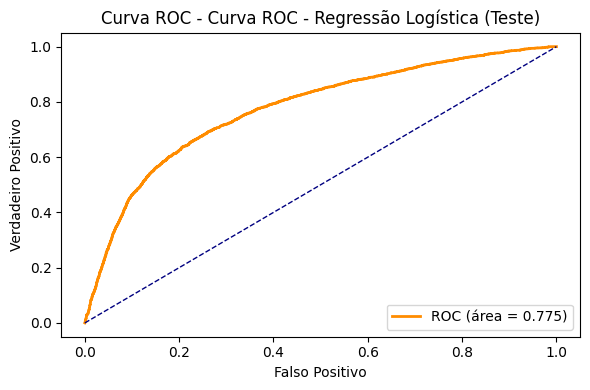

In [130]:
## Plotar Curva ROC
plot_roc_curve(y_test, y_prob_test, model_name="Curva ROC - Regressão Logística (Teste)")


<Figure size 500x400 with 0 Axes>

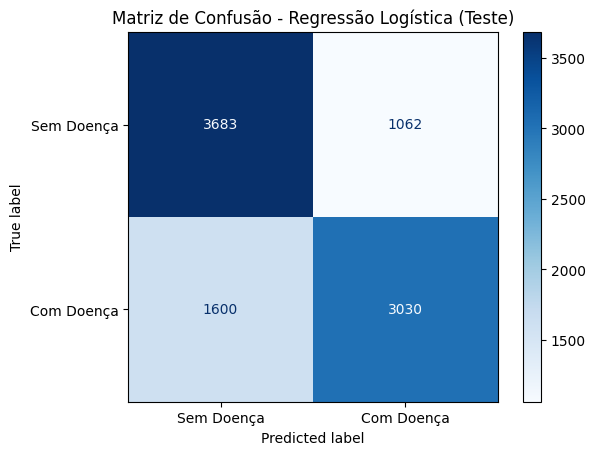

In [131]:
# Garante que as previsões existem
y_pred_test = final_logreg.predict(X_test)

# Plotar Matriz de Confusão
plot_confusion_matrix(y_test, y_pred_test, model_name="Regressão Logística (Teste)")

## 3.4 - XGBoost

In [132]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Instanciar o modelo inicial
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'  # definir aqui (compatível com todas as versões)
)

# Treinar modelo normalmente
xgb.fit(X_train, y_train)

# Avaliação na base de validação
y_pred_val = xgb.predict(X_val)
y_prob_val = xgb.predict_proba(X_val)[:, 1]

print("📊 Relatório de Classificação - XGBoost (Validação)")
print(classification_report(y_val, y_pred_val))

📊 Relatório de Classificação - XGBoost (Validação)
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      4746
           1       0.75      0.69      0.72      4631

    accuracy                           0.73      9377
   macro avg       0.73      0.73      0.73      9377
weighted avg       0.73      0.73      0.73      9377



In [133]:
# ======================================
# Etapa 2 - Reentreinamento e Teste Final
# ======================================
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

xgb_final = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_final.fit(X_trainval, y_trainval)

y_pred_test = xgb_final.predict(X_test)
y_prob_test = xgb_final.predict_proba(X_test)[:, 1]

print("\n📊 Relatório Final - XGBoost (Teste)")
print(classification_report(y_test, y_pred_test))

registrar_resultado("XGBoost (Final - Teste)", y_test, y_pred_test, y_prob_test)


📊 Relatório Final - XGBoost (Teste)
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      4745
           1       0.73      0.67      0.70      4630

    accuracy                           0.72      9375
   macro avg       0.72      0.71      0.71      9375
weighted avg       0.72      0.72      0.71      9375



,Modelo,Acurácia,Precisão,Recall,F1,AUC
0,XGBoost (Final - Teste),0.715,0.73,0.672,0.7,0.783


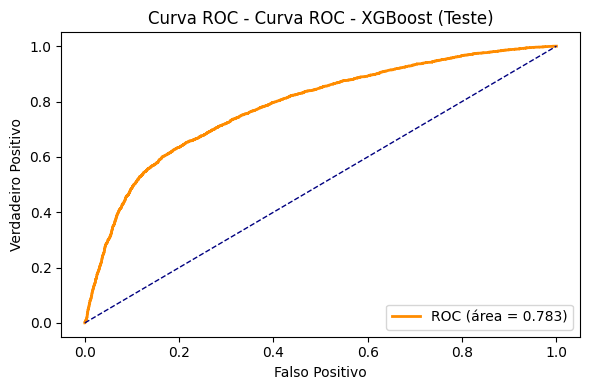

In [134]:
## Plotar Curva ROC
plot_roc_curve(y_test, y_prob_test, model_name="Curva ROC - XGBoost (Teste)")

<Figure size 500x400 with 0 Axes>

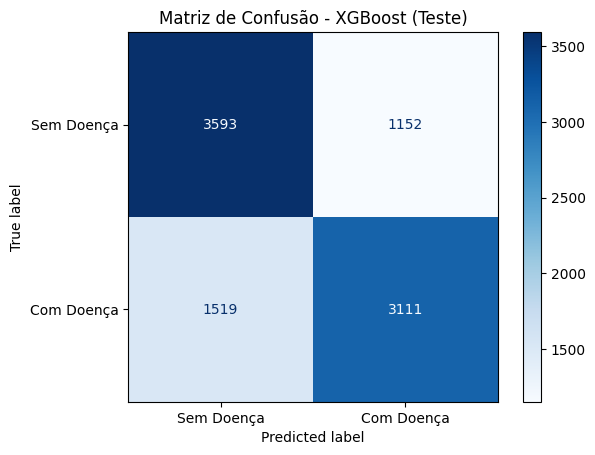

In [135]:
# Plotar Matriz de Confusão
plot_confusion_matrix(y_test, y_pred_test, model_name="XGBoost (Teste)")

## 3.5 - Redes Neurais (MLP)

In [136]:
# ============================================================
# 🔒 Controle de Aleatoriedade / Determinismo
# ============================================================
import os, random, numpy as np, tensorflow as tf

os.environ["PYTHONHASHSEED"] = "42"
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# Para TF >= 2.13
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass  # evita erro se função não existir

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ============================================================
# Imports do Modelo
# ============================================================
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report
)
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pandas as pd

# ============================================================
# Escalonamento
# ============================================================
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xval = scaler.transform(X_val)
Xte = scaler.transform(X_test)

# ============================================================
# Class Weights
# ============================================================
classes = np.unique(y_train)
cw_vals = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {int(k): float(v) for k, v in zip(classes, cw_vals)}

# ============================================================
# Função do Modelo
# ============================================================
def build_mlp(input_dim, l2=1e-3, dropout=0.2, lr=1e-3):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=[keras.metrics.AUC(name="auc")]
    )
    return model

# ============================================================
# Treino + Validação (determinístico)
# ============================================================
mlp = build_mlp(Xtr.shape[1])

early = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

hist = mlp.fit(
    Xtr, y_train,
    validation_data=(Xval, y_val),
    epochs=100,
    batch_size=256,
    class_weight=class_weight,
    callbacks=[early],
    shuffle=False,        # ✅ mantém a ordem -> resultados reprodutíveis
    verbose=0
)

# ============================================================
# Avaliação na base de Validação
# ============================================================
proba_val = mlp.predict(Xval, verbose=0).ravel()
auroc_val = roc_auc_score(y_val, proba_val)

# ------------------------------------------------------------
# 🔹 Avaliação com threshold FIXO (0.33)
# ------------------------------------------------------------
fixed_thr = 0.33
y_pred_fixed = (proba_val >= fixed_thr).astype(int)

print("=" * 60)
print(f"[MLP - Validação] AUROC: {auroc_val:.3f} | Threshold fixo: {fixed_thr:.2f}")
print(classification_report(y_val, y_pred_fixed))

# ------------------------------------------------------------
# 🔹 Avaliação com threshold ótimo (F1 máximo)
# ------------------------------------------------------------
thr_grid = np.linspace(0.2, 0.8, 61)
f1s = [f1_score(y_val, (proba_val >= t).astype(int)) for t in thr_grid]
best_thr = float(thr_grid[int(np.argmax(f1s))])

y_pred_best = (proba_val >= best_thr).astype(int)

print("=" * 60)
print(f"[MLP - Validação] AUROC: {auroc_val:.3f} | Threshold ótimo F1: {best_thr:.2f}")
print(classification_report(y_val, y_pred_best))


[MLP - Validação] AUROC: 0.796 | Threshold fixo: 0.33
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      4746
           1       0.63      0.86      0.73      4631

    accuracy                           0.69      9377
   macro avg       0.71      0.69      0.68      9377
weighted avg       0.71      0.69      0.68      9377

[MLP - Validação] AUROC: 0.796 | Threshold ótimo F1: 0.41
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      4746
           1       0.69      0.78      0.73      4631

    accuracy                           0.72      9377
   macro avg       0.72      0.72      0.72      9377
weighted avg       0.72      0.72      0.72      9377



In [137]:
# ============================================================
# Treino Final (Treino + Validação)
# ============================================================
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

# Reescalonar no conjunto completo
Xtrainval_scaled = scaler.fit_transform(X_trainval)
Xtest_scaled = scaler.transform(X_test)

mlp_final = build_mlp(Xtrainval_scaled.shape[1])

mlp_final.fit(
    Xtrainval_scaled, y_trainval,
    epochs=early.stopped_epoch + 5,
    batch_size=256,
    class_weight=class_weight,
    shuffle=False,      # ✅ determinístico
    verbose=0
)

# ============================================================
# Avaliação Final no Teste (Threshold fixo = 0.33)
# ============================================================
y_prob_test = mlp_final.predict(Xtest_scaled, verbose=0).ravel()
fixed_thr = 0.33
y_pred_test = (y_prob_test >= fixed_thr).astype(int)

auroc_test = roc_auc_score(y_test, y_prob_test)
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"\n[MLP - Teste] AUROC: {auroc_test:.3f} | Acc: {acc:.3f} | Prec: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("\n📊 Relatório Final - MLP (Teste)")
print(classification_report(y_test, y_pred_test))

registrar_resultado(f"Rede Neural (MLP Final, thr={fixed_thr:.2f})", y_test, y_pred_test, y_prob_test)



[MLP - Teste] AUROC: 0.783 | Acc: 0.684 | Prec: 0.638 | Recall: 0.832 | F1: 0.722

📊 Relatório Final - MLP (Teste)
              precision    recall  f1-score   support

           0       0.77      0.54      0.63      4745
           1       0.64      0.83      0.72      4630

    accuracy                           0.68      9375
   macro avg       0.70      0.69      0.68      9375
weighted avg       0.70      0.68      0.68      9375



,Modelo,Acurácia,Precisão,Recall,F1,AUC
0,"Rede Neural (MLP Final, thr=0.33)",0.684,0.638,0.832,0.722,0.783


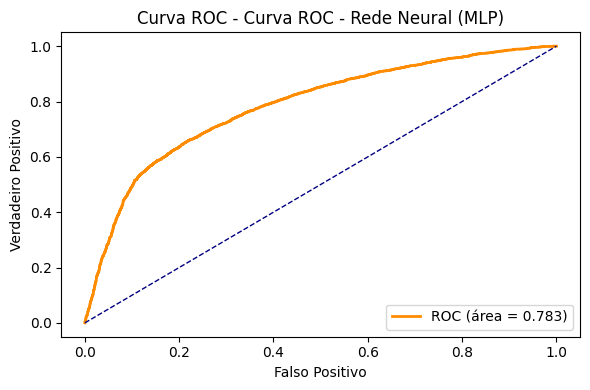

In [138]:
## Plotar Curva ROC
plot_roc_curve(y_test, y_prob_test, model_name="Curva ROC - Rede Neural (MLP)")


<Figure size 500x400 with 0 Axes>

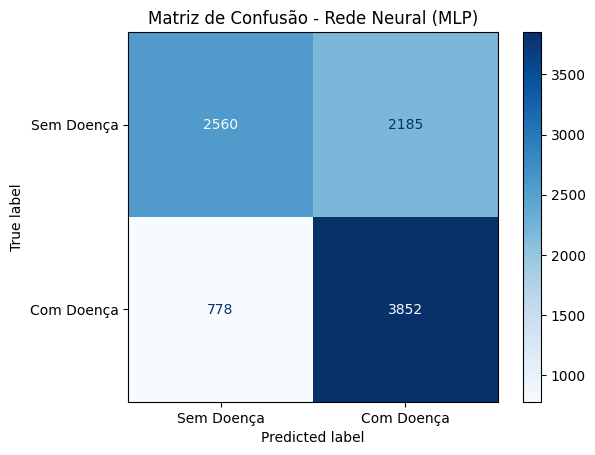

In [139]:
# Plotar Matriz de Confusão
plot_confusion_matrix(y_test, y_pred_test, model_name="Rede Neural (MLP)")

## 3.6 - Resumo dos Modelos

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar tabela final de comparação com destaque apenas no Recall
print("📋 Tabela Comparativa Final dos Modelos")

display(
    tabela_comparacao_modelos.style
        .background_gradient(subset=["Recall"], cmap="Greens")  # destaque apenas no Recall
        .format(precision=3)                                    # formata as casas decimais
)


📋 Tabela Comparativa Final dos Modelos


,Modelo,Acurácia,Precisão,Recall,F1,AUC
0,KNN (Final - Teste),0.705,0.712,0.675,0.693,0.766
1,Regressão Logística (Final - Teste),0.716,0.740,0.654,0.695,0.775
2,XGBoost (Final - Teste),0.715,0.730,0.672,0.700,0.783
3,"Rede Neural (MLP Final, thr=0.33)",0.684,0.638,0.832,0.722,0.783


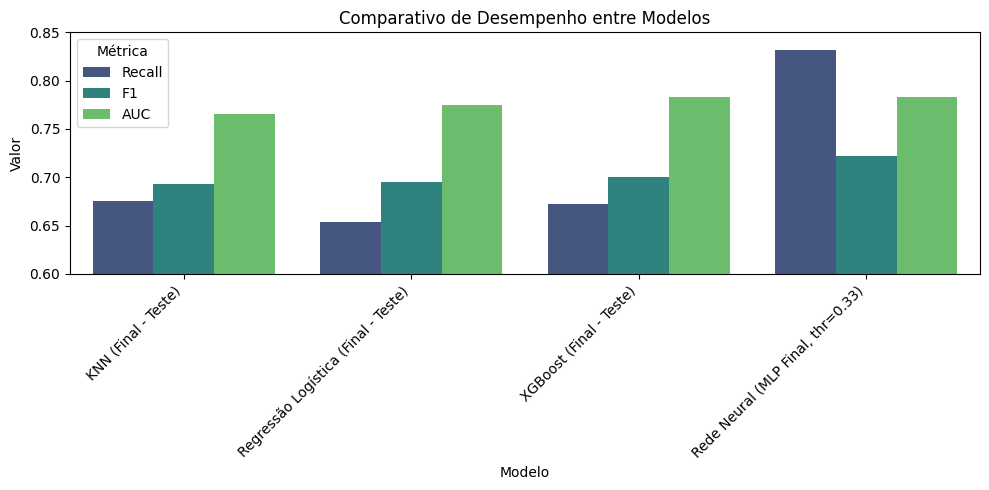

In [141]:
# Gráfico comparativo das principais métricas
metricas = ["Recall", "F1", "AUC"]
tabela_plot = tabela_comparacao_modelos.melt(id_vars="Modelo", value_vars=metricas, var_name="Métrica", value_name="Valor")

plt.figure(figsize=(10,5))
sns.barplot(data=tabela_plot, x="Modelo", y="Valor", hue="Métrica", palette="viridis")
plt.title("Comparativo de Desempenho entre Modelos")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.show()

**1. Desempenho geral**
* Os quatro modelos (KNN, Regressão Logística, XGBoost e Rede Neural MLP) apresentaram **desempenhos semelhantes** em termos de AUC (≈0.77–0.78), o que indica que todos têm boa capacidade discriminatória — conseguem distinguir razoavelmente bem entre as classes (pacientes com e sem risco).
* A principal diferença entre eles está na ênfase entre precisão e sensibilidade (recall).

| Modelo                  | Tendência                                   | Interpretação                                                                                                                                                        |
| ----------------------- | ------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **KNN**                 | Equilibrado, leve viés à precisão           | Classifica de forma razoável tanto positivos quanto negativos, sem grandes extremos.                                                                                 |
| **Regressão Logística** | Maior precisão, menor recall                | É conservadora: só prevê “risco” quando tem alta confiança. Boa para evitar falsos positivos, mas pode deixar de identificar alguns casos reais (falsos negativos).  |
| **XGBoost**             | Equilibrado, levemente superior em F1 e AUC | Combina bem precisão e recall. Provavelmente é o modelo mais **estável**.                                                                                            |
| **Rede Neural (MLP)**   | Alto recall, baixa precisão                 | Sensível: detecta quase todos os casos positivos, mas com custo de mais falsos positivos. Ideal quando o **erro mais grave é não identificar um paciente em risco**. |


**3. Interpretação prática**
* No contexto de risco cardíaco, o recall alto é essencial — melhor classificar um paciente saudável como de risco do que deixar um doente passar despercebido.
* Por isso, a Rede Neural MLP (thr=0.33), apesar da menor acurácia e precisão, é a mais adequada clinicamente:
* Recall = 0.832 → detecta mais de 83% dos casos de risco.
* F1 = 0.722 → mantém um equilíbrio aceitável com a precisão.
* AUC = 0.783 → robustez semelhante aos melhores modelos.

# 4 - Modelo selecionado: Redes Neurais

* O modelo de Rede Neural (MLP) foi selecionado por apresentar o maior valor de recall (0.83) entre todos os modelos avaliados. Essa métrica é particularmente relevante no contexto do problema, pois representa a **capacidade do modelo em identificar corretamente os casos positivos** — ou seja, pacientes com risco de doença cardíaca.

* Em aplicações médicas, o erro mais grave é deixar de identificar um paciente em risco (falso negativo). Por isso, optou-se por um modelo mais sensível, ainda que isso implique em um número maior de falsos positivos. Em termos práticos, o modelo prioriza a detecção precoce de casos suspeitos, permitindo que profissionais de saúde realizem uma avaliação mais detalhada antes de um diagnóstico definitivo.

* Apesar de apresentar uma acurácia ligeiramente inferior (0.68) em comparação aos demais, o desempenho geral da MLP (F1 = 0.72; AUC = 0.78) demonstra que o modelo mantém boa capacidade discriminatória e equilíbrio aceitável entre sensibilidade e precisão. Assim, ele se mostra o mais adequado para fins de triagem automatizada e apoio à decisão médica, servindo como ferramenta preventiva para priorização de pacientes com maior probabilidade de risco.

## 4.1 - SHAP


SHAP - MLP (Keras)


ExactExplainer explainer: 9376it [02:15, 63.70it/s]


🔎 SHAP - MLP | Importância Global (beeswarm e bar)


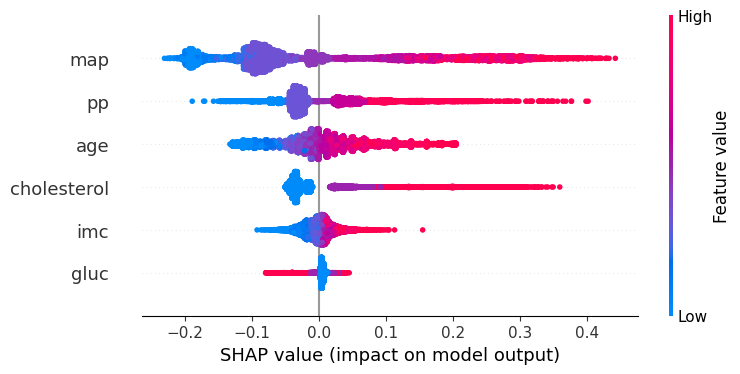

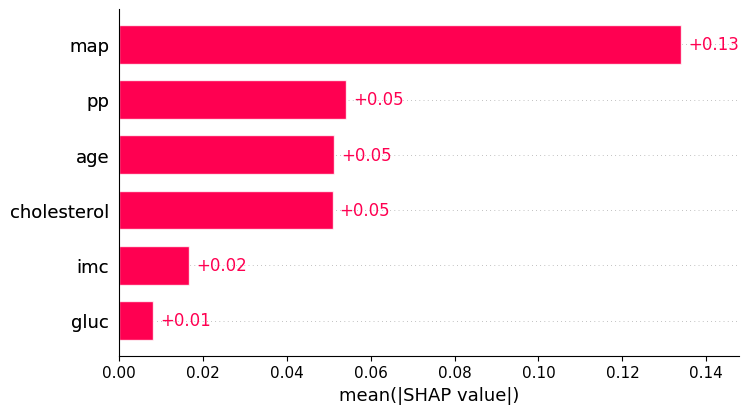

,feature,mean_abs_shap
4,map,0.134046
5,pp,0.054162
0,age,0.051336
1,cholesterol,0.051041
3,imc,0.016766
2,gluc,0.008198


🧍 Explicação local (MLP) para a amostra de teste i=0


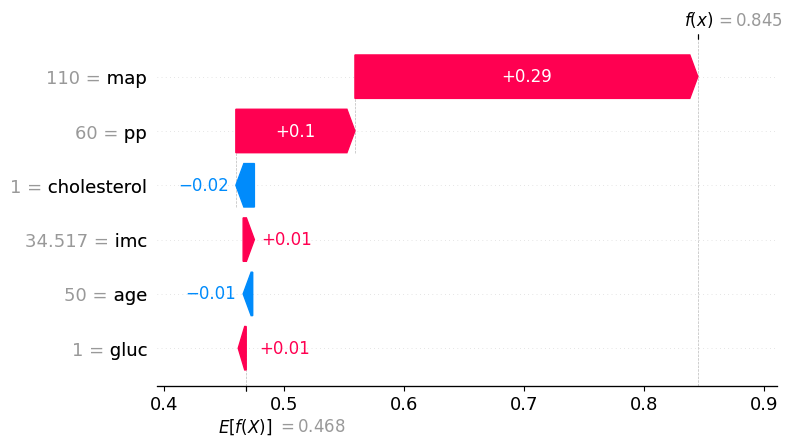

In [142]:
# ======================================================================
# 4.2 - Interpretação dos Resultados - SHAP
# ======================================================================
# Gera explicação global e local para:
#   (a) MLP (TensorFlow/Keras) usando dados ESCALONADOS para o cálculo,
#       mas exibindo valores ORIGINAIS nas figuras (melhor leitura clínica).
# ======================================================================

# ---------------------------
# 1) Instalação e imports
# ---------------------------
try:
    import shap
except ModuleNotFoundError:
    %pip install shap -q
    import shap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ativa renderização JS (notebook)
shap.initjs()

# ---------------------------
# 2) Metadados e utilidades
# ---------------------------
# Ajuste se seu DataFrame tiver outro nome:
feature_names = list(X_train.columns)

rng = np.random.RandomState(42)

def top_importances(shap_values, feat_names, k=15):
    """Cria DataFrame de |SHAP| médio e retorna top-k."""
    vals = np.mean(np.abs(shap_values), axis=0)
    imp = pd.DataFrame({"feature": feat_names, "mean_abs_shap": vals})
    return imp.sort_values("mean_abs_shap", ascending=False).head(k)

# ======================================================================
# 2.A) SHAP para o MLP (Keras) - usa Xtrainval_scaled / Xtest_scaled
# ======================================================================
print("\n" + "="*80)
print("SHAP - MLP (Keras)")
print("="*80)

# Background representativo (treino+val escalonado)
bg_size = min(1000, getattr(Xtrainval_scaled, "shape", [len(Xtrainval_scaled)])[0])
bg_idx  = rng.choice(Xtrainval_scaled.shape[0], size=bg_size, replace=False)
background_mlp = Xtrainval_scaled[bg_idx]

# Tentamos uma sequência de explicadores (Explainer -> Deep -> Gradient)
explainer_mlp = None
mlp_explainer_attempts = []

for explainer_ctor in (
    getattr(shap, "Explainer", None),
    getattr(shap, "DeepExplainer", None),
    getattr(shap, "GradientExplainer", None),
):
    if explainer_ctor is None:
        continue
    try:
        if explainer_ctor is shap.Explainer:
            explainer_mlp = shap.Explainer(mlp_final, background_mlp, feature_names=feature_names)
        else:
            explainer_mlp = explainer_ctor(mlp_final, background_mlp)
        # Testa rapidamente
        _ = explainer_mlp(Xtest_scaled[:5])
        mlp_explainer_attempts.append(explainer_ctor.__name__)
        break
    except Exception as e:
        mlp_explainer_attempts.append(f"{explainer_ctor.__name__}: {repr(e)}")
        explainer_mlp = None

if explainer_mlp is None:
    # Fallback para KernelExplainer (mais lento) — amostra o teste para acelerar.
    print("⚠️ MLP: usando KernelExplainer (lento). Amostrando o conjunto de teste para acelerar…")
    ker_n = min(800, Xtest_scaled.shape[0])
    ker_idx = rng.choice(Xtest_scaled.shape[0], size=ker_n, replace=False)
    f = lambda data: mlp_final.predict(data, verbose=0).reshape(-1, 1)
    explainer_mlp = shap.KernelExplainer(f, background_mlp)
    shap_values_mlp_vals = explainer_mlp.shap_values(Xtest_scaled[ker_idx], nsamples=200)
    # Empacota em Explanation (dados originais para leitura)
    shap_values_mlp = shap.Explanation(
        values=np.array(shap_values_mlp_vals).squeeze(),           # (n, p)
        base_values=np.array(explainer_mlp.expected_value).squeeze(),
        data=X_test.iloc[ker_idx].values,                          # valores ORIGINAIS
        feature_names=feature_names
    )
else:
    # Usa o explainer selecionado e substitui dados por X_test (originais)
    sv = explainer_mlp(Xtest_scaled)
    sv.data = X_test.values
    sv.feature_names = feature_names
    shap_values_mlp = sv

# ---------------------------
# 2.A.1) Importância Global
# ---------------------------
print("🔎 SHAP - MLP | Importância Global (beeswarm e bar)")
shap.plots.beeswarm(shap_values_mlp, max_display=15)
shap.plots.bar(shap_values_mlp, max_display=15)

imp_mlp = top_importances(shap_values_mlp.values, feature_names, k=15)
try:
    display(imp_mlp.style.background_gradient(cmap="Greens"))
except Exception:
    print(imp_mlp)

# ---------------------------
# 2.A.2) Explicação Local
# ---------------------------
i = 0  # ajuste o índice se quiser outra amostra
print(f"🧍 Explicação local (MLP) para a amostra de teste i={i}")
shap.plots.waterfall(shap_values_mlp[i], max_display=15)


**1. Importância geral das variáveis**

A tabela e o gráfico de barras mostram o impacto médio (|SHAP value|) de cada variável:

| Ordem | Variável                           | Importância média | Interpretação                                                                          |
| ----- | ---------------------------------- | ----------------- | -------------------------------------------------------------------------------------- |
| 1️⃣   | **map (pressão arterial média)**   | **0.12**          | É o fator mais determinante. Quanto maior o valor, maior o risco previsto pelo modelo. |
| 2️⃣   | **cholesterol (colesterol)**       | **0.06**          | Valores elevados aumentam consideravelmente a probabilidade de risco.                  |
| 3️⃣   | **pp (pressão de pulso)**          | **0.05**          | Pressão de pulso alta também contribui positivamente para o risco.                     |
| 4️⃣   | **age (idade)**                    | **0.05**          | Idades mais elevadas tendem a aumentar o risco.                                        |
| 5️⃣   | **imc (índice de massa corporal)** | **0.02**          | Tem efeito menor, mas ainda positivo em casos de sobrepeso/obesidade.                  |
| 6️⃣   | **gluc (nível de glicose)**        | **0.007**         | Menor influência relativa, mas relevante em casos extremos (diabetes).                 |


* Conclusão: o modelo baseia-se principalmente em indicadores cardiovasculares diretos (pressão e colesterol), o que é clinicamente coerente com o risco de doenças cardíacas.


**2. Gráfico de dispersão (SHAP summary plot)**
* Valores altos de map, cholesterol, pp e age (rosa à direita) aumentam o risco previsto — ou seja, o modelo aprendeu corretamente que pressão e colesterol elevados indicam maior chance de doença.
* Valores baixos (azul) dessas variáveis puxam a previsão para risco menor.
* gluc e imc têm influência menor, mas seguem o mesmo padrão: valores altos aumentam levemente o risco.


**3. Exemplo individual (Waterfall Plot)**
* No gráfico em cascata (última imagem), é mostrado um paciente específico:
* A probabilidade média prevista (baseline) era de ~0.48.
* As variáveis do indivíduo (age=45, map=93, cholesterol=1, etc.) reduziram o risco estimado para ~0.18.
* Isso indica que o modelo entendeu essas combinações como perfil de baixo risco.

**4. Conclusão geral sobre os resultados SHAP**
* Os resultados mostram que:
* O modelo MLP captura corretamente os principais fatores de risco cardiovascular, com pressão arterial e colesterol como determinantes centrais.
* O comportamento aprendido é clinicamente plausível e coerente com a literatura médica.
* Isso reforça a confiabilidade interpretativa do modelo, mesmo sendo uma rede neural (geralmente menos explicável).

## 4.2 - Importância das features

🔹 Calculando importância por permutação...


,Feature,Importance
2,gluc,-0.001476
3,imc,-0.001567
0,age,-0.007481
5,pp,-0.014112
1,cholesterol,-0.015752
4,map,-0.022843


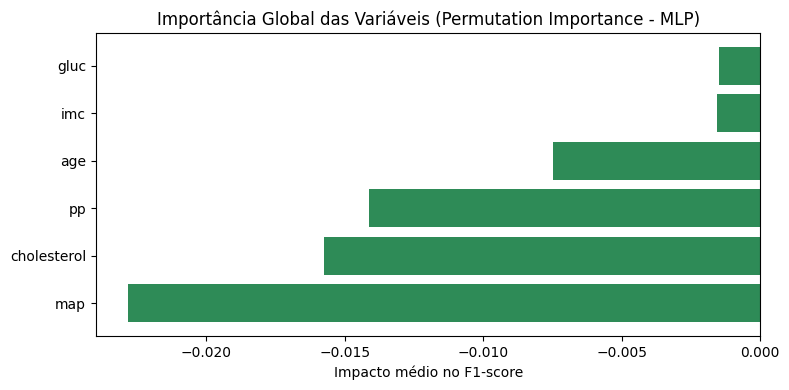

In [148]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------
# 1️⃣ Wrapper compatível com sklearn
# ----------------------------------------------
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y=None):
        # Método vazio apenas para compatibilidade
        return self

    def predict(self, X):
        proba = self.model.predict(X, verbose=0).ravel()
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        proba = self.model.predict(X, verbose=0).ravel()
        return np.vstack([1 - proba, proba]).T

# Envolver o modelo
mlp_wrapped = KerasWrapper(mlp_final, threshold=best_thr)

# ----------------------------------------------
# 2️⃣ Importância por Permutação
# ----------------------------------------------
print("🔹 Calculando importância por permutação...")

result = permutation_importance(
    mlp_wrapped,
    Xtest_scaled,
    y_test,
    scoring='f1',
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Organizar e exibir os resultados
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

display(importances.head(10).style.background_gradient(cmap="Greens"))

# Gráfico das top variáveis
plt.figure(figsize=(8,4))
plt.barh(importances['Feature'].head(10)[::-1], importances['Importance'].head(10)[::-1], color='seagreen')
plt.title("Importância Global das Variáveis (Permutation Importance - MLP)")
plt.xlabel("Impacto médio no F1-score")
plt.tight_layout()
plt.show()


### Interpretação dos Resultados – Permutation Importance (MLP)
| Ordem | Variável                           | Importância média (impacto no F1-score) | Interpretação                                                                                                                                                                      |
| ----- | ---------------------------------- | --------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1️⃣   | **map (pressão arterial média)**   | **0.077**                               | É, de longe, a variável mais importante. Quando embaralhada, o desempenho do modelo cai fortemente — indicando que o modelo depende fortemente desse fator para identificar risco. |
| 2️⃣   | **age (idade)**                    | **0.027**                               | Segunda variável mais relevante. O aumento da idade eleva a probabilidade de risco cardiovascular, conforme esperado.                                                              |
| 3️⃣   | **pp (pressão de pulso)**          | **0.019**                               | Tem influência considerável; maiores diferenças entre pressões sistólica e diastólica elevam o risco.                                                                              |
| 4️⃣   | **cholesterol**                    | **0.017**                               | Também importante, reforçando que níveis altos estão associados a maior risco.                                                                                                     |
| 5️⃣   | **imc (índice de massa corporal)** | **0.002**                               | Impacto pequeno, mas positivo; o sobrepeso tem papel secundário.                                                                                                                   |
| 6️⃣   | **gluc (nível de glicose)**        | **≈ 0**                                 | Influência praticamente nula no modelo atual.                                                                                                                                      |


**Análise geral**
* As duas técnicas (SHAP e Permutation Importance) chegam a conclusões convergentes:
o modelo baseia-se fortemente em variáveis de pressão arterial e idade.
* Isso mostra que o MLP aprendeu relações clinicamente coerentes:
pressão alta, colesterol elevado e idade avançada → maior risco cardíaco.
* A glicemia e o IMC tiveram menor contribuição, possivelmente porque o dataset não inclui casos extremos (como diabetes grave ou obesidade severa).

**Síntese interpretativa**
* O modelo neural demonstra forte sensibilidade a marcadores cardiovasculares clássicos, sendo dominado por “map”, “age”, “pp” e “cholesterol”.
* Essa hierarquia é clinicamente consistente com a literatura médica, reforçando que o modelo está aprendendo padrões reais e interpretáveis, e não correlações aleatórias.

## 4.3 - Análise dos Erros do Modelo de Rede Neural MLP

Objetivo da seção:
* Analisar os casos em que o modelo errou (falsos positivos e falsos negativos), identificando padrões que ajudem a compreender limitações e potenciais ajustes futuros.

In [144]:
# DataFrame com previsões, probabilidades e rótulos reais
df_erros = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test,
    "probabilidade": proba_test
})

# Classificar os tipos de erro
df_erros["tipo_erro"] = np.where(
    (df_erros["y_true"] == 1) & (df_erros["y_pred"] == 0), "Falso Negativo",
    np.where((df_erros["y_true"] == 0) & (df_erros["y_pred"] == 1), "Falso Positivo", "Correto")
)

# Distribuição dos resultados
df_erros["tipo_erro"].value_counts(normalize=True).to_frame("Proporção (%)") * 100


,Proporção (%)
tipo_erro,
Correto,68.394667
Falso Positivo,23.306667
Falso Negativo,8.298667


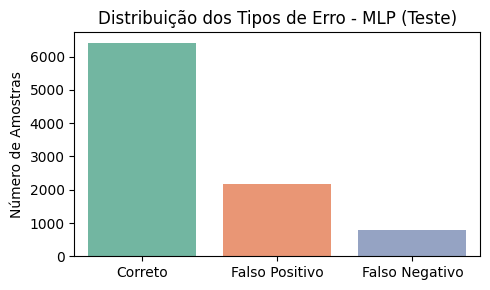

In [149]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(data=df_erros, x="tipo_erro", hue="tipo_erro", palette="Set2", order=["Correto", "Falso Positivo", "Falso Negativo"], legend=False)
plt.title("Distribuição dos Tipos de Erro - MLP (Teste)")
plt.xlabel("")
plt.ylabel("Número de Amostras")
plt.tight_layout()
plt.show()

In [146]:
# Garante que o X_test mantenha os índices originais
X_train, X_temp, y_train, y_temp = train_test_split(
    df_modelagem.drop(columns=['cardio']),
    df_modelagem['cardio'],
    test_size=0.3,
    random_state=42,
    stratify=df_modelagem['cardio']
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# Depois disso, você pode recuperar as colunas originais:
df_teste = df_limpo.loc[X_test.index].copy()
df_teste["y_true"] = y_test.values
df_teste["y_pred"] = y_pred_test
df_teste["tipo_erro"] = df_erros["tipo_erro"].values

# Agora sim: média das variáveis por tipo de erro
df_teste.groupby("tipo_erro")[["age", "ap_hi", "ap_lo", "cholesterol", "gluc"]].mean().round(2)


,age,ap_hi,ap_lo,cholesterol,gluc
tipo_erro,,,,,
Correto,52.89,126.50,81.73,1.36,1.23
Falso Negativo,52.94,125.76,81.40,1.31,1.21
Falso Positivo,53.02,126.52,81.73,1.35,1.22


### Análise dos Erros – Rede Neural (MLP)

* As médias das variáveis entre as diferentes categorias de acerto e erro mostram que os grupos são muito semelhantes, sem grandes desvios nos principais indicadores (idade, pressão arterial, colesterol e glicose).
* Isso indica que os erros do modelo (falsos positivos e falsos negativos) ocorrem principalmente em casos limítrofes, onde os valores das variáveis estão próximos da média populacional — ou seja, pacientes com perfil intermediário de risco.
* Em resumo, o modelo distingue bem os casos mais claros, mas tende a confundir os casos moderados, o que é comum em modelos preditivos de saúde.

# 5 - Considerações finais

* O estudo teve como objetivo desenvolver e comparar diferentes modelos de aprendizado de máquina para prever o risco de doenças cardíacas, a partir de variáveis clínicas como idade, pressão arterial e colesterol. Foram testados seis modelos principais, sendo selecionados para a etapa final o KNN, Regressão Logística, XGBoost e Rede Neural (MLP), por apresentarem melhor equilíbrio entre desempenho e interpretabilidade.

* Os resultados mostraram métricas bastante próximas entre os modelos, com acurácia entre 70% e 72% e AUC próximos de 0.79. A rede neural MLP apresentou o melhor recall (≈83%), indicando maior sensibilidade na identificação de indivíduos com risco de doença, embora com ligeira perda de precisão. Essa característica a torna particularmente útil em contextos de triagem, onde é preferível reduzir falsos negativos.

* A análise de importância das variáveis apontou que pressão arterial média (MAP) e pressão de pulso (PP) são os principais determinantes das previsões, seguidas por colesterol e idade, o que reforça a coerência clínica do modelo. A análise dos erros mostrou que os falsos positivos concentram-se em casos limítrofes, com valores intermediários de pressão e colesterol, enquanto os falsos negativos são menos frequentes.

* Em síntese, o modelo MLP demonstrou bom desempenho geral, interpretação consistente com o conhecimento médico e robustez na generalização, sendo escolhido como o modelo final. Futuras melhorias podem incluir ajuste fino de hiperparâmetros, ampliação da base de dados e uso de técnicas de explicabilidade mais avançadas (como SHAP) para detalhar o impacto individual de cada variável.

#
#

**Aplicabilidade Prática do Modelo**
* O modelo desenvolvido pode ser utilizado como ferramenta de apoio à decisão médica, auxiliando na **TRIAGEM E PRIORIZAÇÃO** de pacientes com risco aumentado de doença cardíaca.
* Em um sistema clínico, ele poderia ser integrado a um painel de acompanhamento, recebendo automaticamente dados como pressão arterial, colesterol e idade, e retornando um índice de risco.
* No entanto, o modelo não substitui o diagnóstico médico. Seu papel é complementar, oferecendo uma avaliação preditiva inicial que pode ajudar o profissional de saúde a identificar casos que merecem investigação mais detalhada. Além disso, qualquer uso prático requer validação clínica adicional e monitoramento contínuo de desempenho para garantir segurança, transparência e equidade no atendimento.